                  Passengers
DepartureStation    0.168797
ArrivalStation      0.083777
Destination_Type    0.016709
Origin_Type         0.042435
Capacity            0.622162
STD_day             0.010527
STD_month           0.055593


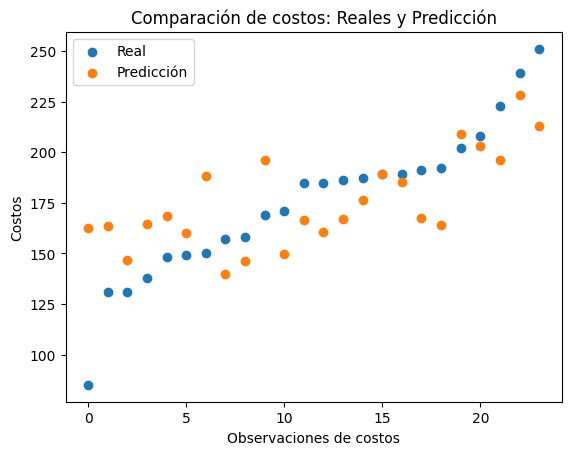

Mean Absolute Error (MAE): 21.26
Mean Absolute Percentage Error (MAPE): 18.37%


In [ ]:
import pandas as pd
df = pd.read_csv("mapped_flight_2023_no_null_without_bookings.csv")
df = df.iloc[:,2:11]
df= df.dropna()
x = df[['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type', 'Capacity','STD_day','STD_month']].values # variables independientes
y = df['Passengers'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.ensemble import GradientBoostingRegressor


model_regression = GradientBoostingRegressor()
x_labels = ['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type', 'Capacity','STD_day','STD_month']
c_label = ['Coeficientes']
from sklearn.linear_model import ElasticNet


model_regression.fit(x_train, y_train)

x_labels = ['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type', 'Capacity','STD_day','STD_month']
c_label = ['Passengers']

coeff_df = pd.DataFrame(model_regression.feature_importances_, index=x_labels, columns=c_label)
print(coeff_df)

y_pred = model_regression.predict(x_test)

residuals = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Residual': y_test - y_pred})
residuals = residuals.sample(n = 24)
residuals = residuals.sort_values(by='Real')
residuals

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

plt.scatter(np.arange(24), residuals['Real'], label = "Real")
plt.scatter(np.arange(24), residuals['Predicción'], label = "Predicción")

plt.title("Comparación de costos: Reales y Predicción")

plt.xlabel("Observaciones de costos")

plt.ylabel("Costos")

plt.legend(loc='upper left')

plt.show() # desplegamos el gráfico
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(abs((y_test - y_pred) / y_test)) * 100

print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

In [ ]:
r2_score(y_test, y_pred)

0.44060722184106194

In [ ]:

df = pd.read_csv("mapped_flight_2023_no_null_without_bookings.csv")

flight_info = {}
for index, row in df.iterrows():
    flight_id = row['Flight_ID']
    info = row.drop(['Flight_ID', 'Aeronave', 'Passengers']).tolist()
    if flight_id not in flight_info:
        flight_info[flight_id] = []
    flight_info[flight_id].append(info)

def get_info_by_flight_id(flight_id):
    return flight_info.get(flight_id, "Flight ID not found")


In [ ]:

flight_id = input("Enter Flight ID: ")
print(get_info_by_flight_id(flight_id))



Enter Flight ID: 5eb77c0fb66c613c212698fed0e53ef7
[[16.0, 28.0, 2.0, 5.0, 186, 21, 3]]


[3, 1, 1, 1, 240, 1, 3]

In [ ]:
A = [8,5,2,4,220,1,5]

In [ ]:
custom_output = model_regression.predict([A])
print("Predicted output:", custom_output)

Predicted output: [204.56692729]
